# Prediksi Cuaca Hari Besok di Australia

## Data Preparation

### Import Library

In [1]:
#Import libary-libary yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Menampilkan Data

In [2]:
#Menload data
df =pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
#Menload data per kolom
dt =pd.read_csv("weatherAUS.csv", usecols=['Rainfall','Location','WindGustDir'])
dt

,Location,Rainfall,WindGustDir
0,Albury,0.6,W
1,Albury,0.0,WNW
2,Albury,0.0,WSW
3,Albury,0.0,NE
4,Albury,1.0,W
...,...,...,...
145455,Uluru,0.0,E
145456,Uluru,0.0,NNW
145457,Uluru,0.0,N
145458,Uluru,0.0,SE


### Menampilkan informasi data

In [4]:
#Mengecek kolom dan baris data
df.shape

(145460, 23)

In [5]:
#Menampilkan data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
#Menampilkan data terbawah
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [7]:
#Menampilkan info dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
#Menampilkan deskripsi data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [9]:
#Mengecek nilai modus
print(df.loc[:, "WindGustDir"].mode())
print(df.loc[:, "WindDir9am"].mode())
print(df.loc[:, "WindDir3pm"].mode())
print(df.loc[:, "RainToday"].mode())
print(df.loc[:, "RainTomorrow"].mode())

0    W
dtype: object
0    N
dtype: object
0    SE
dtype: object
0    No
dtype: object
0    No
dtype: object


### Melihat nilai unique 

In [10]:
#Melihat nilai unique setiap kolom 
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [11]:
#Melihat fill dari nilai unique pada kolom
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [12]:
#Menghitung banyak data dari nilai unique
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [13]:
#Menghitung presentase nilai unique
df['RainTomorrow'].value_counts()/len(df)

No     0.758394
Yes    0.219146
Name: RainTomorrow, dtype: float64

### Mencari variabel categorical

In [14]:
# Melihat data kategorikal

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :', categorical)
df[categorical].head()

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [15]:
# Melihat missing value pada data kategorikal
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

### Melihat nilai cardinality 

In [16]:
# Meliat data cardinality di kategorikal variabel 

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model.
We can see that there is a Date variable which needs to be preprocessed. The preprocessing will do in the following section.

In [17]:
#Feature engineer date 
df['Date'].dtypes

dtype('O')

In [18]:
# Mengubah tipedata "date" dari object ke datetime
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# Extract year from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [20]:
# Melihat kembali data setelah melakukan feature engineering kepada "date"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

We can see that there are three additional columns created from Date variable. Now, I will drop the original Date variable from the dataset.

In [21]:
# drop the original Date variable
df.drop('Date', axis=1, inplace = True)

In [22]:
# preview the dataset again
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Melihat variabel numerical

In [23]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)
df[numerical].head()

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [24]:
# check missing values in numerical variables
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

### Mengidentifikasi outliers

In [25]:
# Melihat persebaran data
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,2012.769751,6.399615,15.712258
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,2.537684,3.427262,8.794789
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


Dapat dilihat dari tabel diatas bahwa pada beberapa kolom seperti "Rainfall" dan "Evaporation" memiliki nilai max yang jauh dari rata-rata, jadi dapat dipastikan kolom tersebut memiliki outliers

Text(0, 0.5, 'WindSpeed3pm')

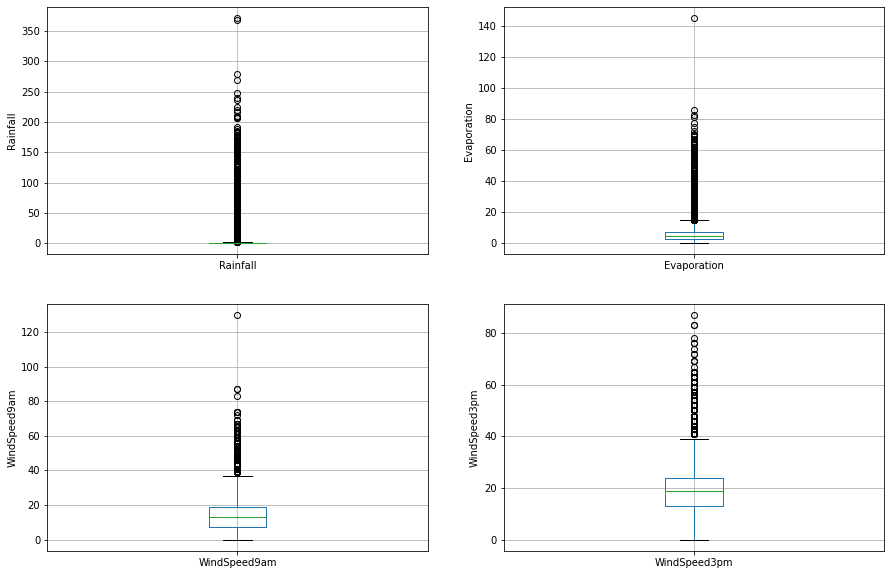

In [26]:
#Menampilkan outliers dalam bentuk grafik
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

### Membuat histogram data

Membuat histogram data untuk melihat persebaran data, apakah mereka normal atau miring (skewed) 
If the variable follows normal distribution, then I will do Extreme Value Analysis otherwise if they are skewed, I will find IQR (Interquantile range).

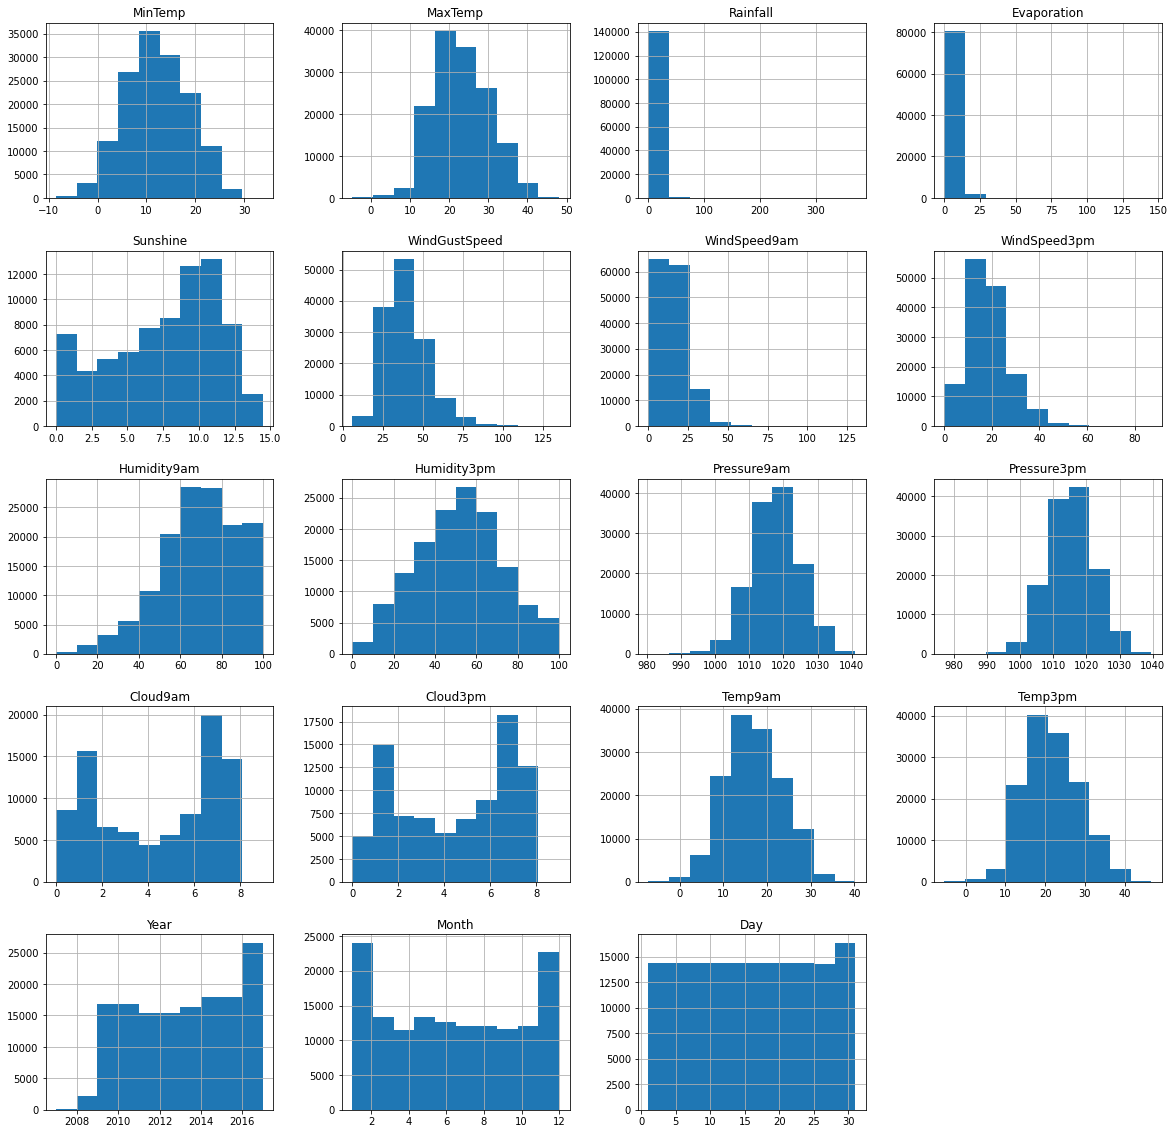

In [27]:
#Menampilkan histogram data 
df.hist(bins=10, figsize=(20,20))

plt.show()

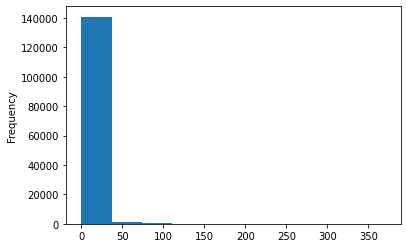

In [28]:
#Menampilkan histogram kolom 
df['Rainfall'].plot.hist(bins=10)

plt.show()

Dapat dilihat bahwa persebaran data menunjukkan skewed, jadi kita akan menggunakan IQR untuk mendeteksi outliers

In [29]:
# Menghitung jangkauan nilai IQR dengan mengurangi data dari kuartil atas dengan kuartil bawah
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

MinTemp           9.3
MaxTemp          10.3
Rainfall          0.8
Evaporation       4.8
Sunshine          5.8
WindGustSpeed    17.0
WindSpeed9am     12.0
WindSpeed3pm     11.0
Humidity9am      26.0
Humidity3pm      29.0
Pressure9am       9.5
Pressure3pm       9.6
Cloud9am          6.0
Cloud3pm          5.0
Temp9am           9.3
Temp3pm           9.8
Year              4.0
Month             6.0
Day              15.0
dtype: float64


In [30]:
min_IQR = Q1 - 1.5 * IQR
print('IQR minimum =')
min_IQR

IQR minimum =


MinTemp            -6.35
MaxTemp             2.45
Rainfall           -1.20
Evaporation        -4.60
Sunshine           -3.90
WindGustSpeed       5.50
WindSpeed9am      -11.00
WindSpeed3pm       -3.50
Humidity9am        18.00
Humidity3pm        -6.50
Pressure9am       998.65
Pressure3pm       996.00
Cloud9am           -8.00
Cloud3pm           -5.50
Temp9am            -1.65
Temp3pm             1.90
Year             2005.00
Month              -6.00
Day               -14.50
dtype: float64

In [31]:
nilai_min = np.min(df)
print('Nilai minimum data = ', )
nilai_min

Nilai minimum data = 


C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Location         Adelaide
MinTemp              -8.5
MaxTemp              -4.8
Rainfall              0.0
Evaporation           0.0
Sunshine              0.0
WindGustSpeed         6.0
WindSpeed9am          0.0
WindSpeed3pm          0.0
Humidity9am           0.0
Humidity3pm           0.0
Pressure9am         980.5
Pressure3pm         977.1
Cloud9am              0.0
Cloud3pm              0.0
Temp9am              -7.2
Temp3pm              -5.4
Year                 2007
Month                   1
Day                     1
dtype: object

In [32]:
max_IQR = Q3 + 1.5 * IQR
print('IQR maksimum = ')
max_IQR

IQR maksimum = 


MinTemp            30.85
MaxTemp            43.65
Rainfall            2.00
Evaporation        14.60
Sunshine           19.30
WindGustSpeed      73.50
WindSpeed9am       37.00
WindSpeed3pm       40.50
Humidity9am       122.00
Humidity3pm       109.50
Pressure9am      1036.65
Pressure3pm      1034.40
Cloud9am           16.00
Cloud3pm           14.50
Temp9am            35.55
Temp3pm            41.10
Year             2021.00
Month              18.00
Day                45.50
dtype: float64

In [33]:
nilai_max = np.max(df)
print('Nilai maksimum data = ', )
nilai_max

Nilai maksimum data = 


Location         Woomera
MinTemp             33.9
MaxTemp             48.1
Rainfall           371.0
Evaporation        145.0
Sunshine            14.5
WindGustSpeed      135.0
WindSpeed9am       130.0
WindSpeed3pm        87.0
Humidity9am        100.0
Humidity3pm        100.0
Pressure9am       1041.0
Pressure3pm       1039.6
Cloud9am             9.0
Cloud3pm             9.0
Temp9am             40.2
Temp3pm             46.7
Year                2017
Month                 12
Day                   31
dtype: object

In [34]:
(print(df <(Q1 - 1.5*IQR)) | (Q3 + 1.5*IQR))

C:\Users\admin\AppData\Local\Temp/ipykernel_7096/993930909.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (print(df <(Q1 - 1.5*IQR)) | (Q3 + 1.5*IQR))


        Cloud3pm  Cloud9am    Day  Evaporation  Humidity3pm  Humidity9am  \
0          False     False  False        False        False        False   
1          False     False  False        False        False        False   
2          False     False  False        False        False        False   
3          False     False  False        False        False        False   
4          False     False  False        False        False        False   
...          ...       ...    ...          ...          ...          ...   
145455     False     False  False        False        False        False   
145456     False     False  False        False        False        False   
145457     False     False  False        False        False        False   
145458     False     False  False        False        False        False   
145459     False     False  False        False        False        False   

        Location  MaxTemp  MinTemp  Month  ...  Sunshine  Temp3pm  Temp9am  \
0        

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [NoneType]

In [ ]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [ ]:
# find outliers for Evapora>tion variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [ ]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [ ]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

### Menampilkan nilai kolerasi data

In [ ]:
#Menampilkan kolerasi data
import seaborn as sns
sns.heatmap(kolerasi);

In [ ]:
#Menampilkan kolerasi dari semua kolom data
kolerasi=df.corr()
kolerasi

### Melihat korelasi suatu kolom dengan kolom lain

Menggunakan pair plot untuk melihat korelasi antar kolom

In [ ]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm']

In [ ]:
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['Temp9am'],  x = df['MinTemp'])
plt.show()

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(y = df['Temp9am'],  x = df['MaxTemp'])
plt.show()

Kolom Temp9am memiliki korelasi yang kuat dengan "MinMaxTemp"

### Menampilkan standar deviasi dan varians

In [ ]:
#Standar deviasi
print(df.loc[:].std())
#Varians
print(df.loc[:].var())

### Menampilkan informasi grafik

In [ ]:
#Menampilkan informasi kolom Date dalam bentuk Grafik
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
sns.countplot(df['MinTemp'])

In [ ]:
#Menampilkan informasi kolom Date dalam bentuk Grafik
f = plt.figure(figsize=(12,6))

f.add_subplot(1,2,1)
sns.countplot(df['RainTomorrow'])

### Mengidentifikasi missing value

In [ ]:
#Mengcek Missing Value
df.isnull().sum()

Keterangan : Pada kolom Rainfall, RainToday, dan RainTomorrow terjadi missing value (nilai hilang)

## Data Preprocessing

### Data Cleaning (Penyelesaian Missing Value)

In [ ]:
# Penyelesaian missing value pada data numerical
df['MinTemp'] = df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall'] = df['Rainfall'].fillna(df['Rainfall'].mean())
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Evaporation'] = df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine'] = df['Sunshine'].fillna(df['Sunshine'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm'] = df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm'] = df['Temp3pm'].fillna(df['Temp3pm'].mean())

In [ ]:
# Penyelesaian missing value pada data kategorical
df['WindGustDir'].value_counts()
df['WindGustDir'] = df['WindGustDir'].fillna('W')
df['WindDir9am'].value_counts()
df['WindDir9am'] = df['WindDir9am'].fillna('N')
df['WindDir3pm'].value_counts()
df['WindDir3pm'] = df['WindDir3pm'].fillna('SE')
df['RainToday'].value_counts()
df['RainToday'] = df['RainToday'].fillna('No')
df['RainTomorrow'].value_counts()
df['RainTomorrow'] = df['RainTomorrow'].fillna('No')

In [ ]:
#Mengcek kembali missing value
df.isnull().sum()

Keterangan : Kami telah melakukan penyelesaian missing value yaitu dengan cara mengganti nilai yang hilang dengan nilai yang sering muncul pada masing-masing kolom.

In [ ]:
#Mengecek kembali info data setelah dilakbukan penyelesaian missing value
df.info()

### Mengatasi outlier

#its time to remove the outliers in our data - we are using Z-score to detect and remove the outliers.
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

### Mengencoding Data Kategori menjadi Numerik menggunakan LabelEncoder

In [ ]:
#Mengganti tipe data String menjadi numerik pada kolom Location

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
f_location = le.classes_
df['WindGustDir'] = le.fit_transform(df['WindGustDir'])
f_windgust = le.classes_
df['WindDir9am'] = le.fit_transform(df['WindDir9am'])
f_wind9 = le.classes_
df['WindDir3pm'] = le.fit_transform(df['WindDir3pm'])
f_wind3 = le.classes_
df['RainToday'] = le.fit_transform(df['RainToday'])
f_raintoday = le.classes_
df['RainTomorrow'] = le.fit_transform(df['RainTomorrow'])
f_raintomorrow = le.classes_

In [ ]:
df.info()

## Train dan Test

### Train dan Test Split

In [ ]:
#Mendifinisikan nilai X dan y
x = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.describe()

In [ ]:
#Training 80%
print(x.shape)
print(x_train.shape)
print(x_test.shape)

#Testing 20%
print(y.shape)
print(y_train.shape)
print(y_test.shape)

### Scalling (Standarisasi/Normalisasi) 

In [ ]:
#Melakukan standarisasi 
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train)
x_train_minmax

### Model Training Menggunakan LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train_minmax, y_train)

## Model Evaluation

### Accuracy Score

In [ ]:
#Akurasi dari Training Data
x_train_prediction = model.predict(x_train_minmax)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Keterangan : Jadi nilai akurasi model yang kami lakukan yaitu sebesar (0,79) yang dipresentasekan sebesar 79%

In [ ]:
#Akurasi dari Test Data
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy on Test Data : ', test_data_accuracy)

Keterangan : Jadi nilai akurasi model yang kami lakukan yaitu sebesar (0,79) yang dipresentasekan sebesar 79%

# Predictive System

In [ ]:
input_data = (396,2,6,0)

#input data ke numpy array
input_data_as_numpy_array= np.asarray(input_data)

#input data reshaped
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
    print('Perkiraan hari besok tidak akan hujan')
else:
    print('Perkiraan hari besok akan terjadi hujan ')

Keterangan : Ini system yang memprediksi apakah hari berikutnya hujan atau tidak dengan menginputkan data dati dataset yang telah proses.